In [13]:
import gym

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 14,
    'figure.figsize': (10, 6)
})

In [29]:
def generate_random_baseline(env_name, episodes, max_steps):
    env = gym.make(env_name)
    rewards = []

    for _ in tqdm(range(episodes)):
        total_reward = 0
        done = False
        state = env.reset()
        for _ in range(max_steps):
            action = env.action_space.sample()
            state, reward, done, info, _ = env.step(action)
            total_reward += reward
            if done:
                break
        rewards.append(total_reward)

    env.close()
    return pd.DataFrame({'episode': range(1, episodes + 1), 'score': rewards})

In [30]:
lunar_lander_baseline = generate_random_baseline('LunarLander-v2', 5000, 500)
acrobot_baseline = generate_random_baseline('Acrobot-v1', 3000, 500)

100%|██████████████████████████████████████████████████████| 3000/3000 [02:02<00:00, 24.58it/s]


In [32]:
lunar_lander_baseline.to_csv("lunar_lander_baseline.csv", index=None)
acrobot_baseline.to_csv("acrobot_baseline.csv", index=None)

In [3]:
lunar_lander_d2 = pd.read_csv("lunar_lander_d2.csv")
lunar_lander_d3 = pd.read_csv("lunar_lander_d3.csv")

acrobot_d2 = pd.read_csv("acrobot_d2.csv")
acrobot_d3 = pd.read_csv("acrobot_d3.csv")

In [36]:
def moving_average(data, window_size):
    return data['score'].rolling(window=window_size).mean()

window_size = 100
lunar_lander_d3['moving_avg'] = moving_average(lunar_lander_d3, window_size)
lunar_lander_d2['moving_avg'] = moving_average(lunar_lander_d2, window_size)
lunar_lander_baseline['moving_avg'] = moving_average(lunar_lander_baseline, window_size)

acrobot_d3['moving_avg'] = moving_average(acrobot_d3, window_size)
acrobot_d2['moving_avg'] = moving_average(acrobot_d2, window_size)
acrobot_baseline['moving_avg'] = moving_average(acrobot_baseline, window_size)

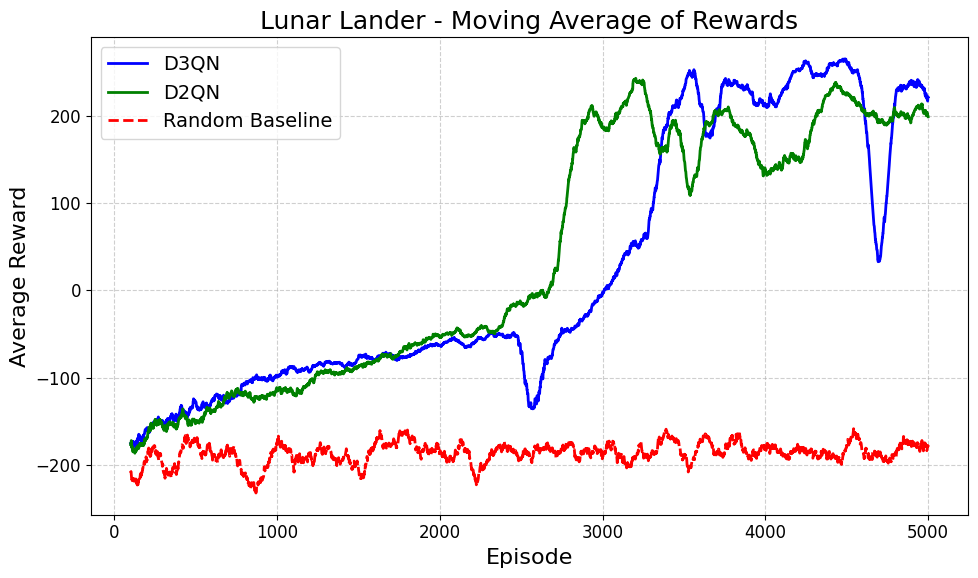

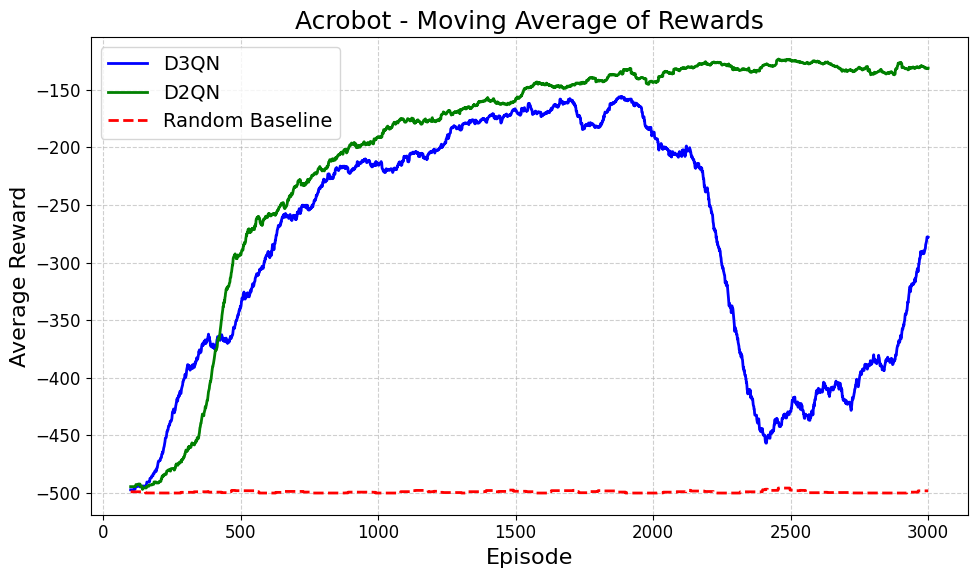

In [40]:
def plot_data(d3, d2, base, env_name, filename):
    fig, ax = plt.subplots()
    ax.plot(d3['episode'], d3['moving_avg'], label='D3QN', linewidth=2, color='blue')
    ax.plot(d2['episode'], d2['moving_avg'], label='D2QN', linewidth=2, color='green')
    ax.plot(base['episode'], base['moving_avg'], label='Random Baseline', linewidth=2, color='red', linestyle='--')
    
    ax.set_title(f'{env_name} - Moving Average of Rewards')
    ax.set_xlabel('Episode')
    ax.set_ylabel('Average Reward')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.savefig(filename, format='png', dpi=300)

plot_data(lunar_lander_d3, lunar_lander_d2, lunar_lander_baseline, "Lunar Lander", "lunar_lander_plot.png")
plot_data(acrobot_d3, acrobot_d2, acrobot_baseline, "Acrobot", "acrobot_plot.png")